In [29]:
import numpy as np
import torch

Define Inputs & Targets

In [30]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

In [31]:
inputs.shape
#Shape: (5, 3) → 5 samples, each with 3 features.

(5, 3)

# what is dtype='float32' why it is used

**What is `dtype='float32'?`**

* `dtype` stands for data type . It specifies the type of data stored in an array or tensor.

* `'float32'` means that the numbers are stored as 32-bit floating-point numbers (decimals).

## Why Use float32 or float64?

### Precision:

* Floating-point numbers (`float32`) allow us to work with decimals, which are essential for many machine learning tasks.

* For example, if you’re working with weights and biases in a neural network, they often need to be very small or fractional values like `0.001 `or `-2.345`. Using integers (`int`) would not work here.

- **float32** can represent numbers with up to 7 decimal digits of precision.
- **float64** can represent numbers with up to 15 decimal digits of precision.

### Memory Efficiency:
- **float32** uses less memory (4 bytes per number) compared to **float64** (8 bytes per number). This can be important when working with large datasets or models.

### Performance:
- **float32** is generally faster to process on modern hardware, especially GPUs, which are optimized for 32-bit operations.


In [32]:
# Targets : These are the values we want our model to predict. Each row corresponds to the target values for one sample.
targets = np.array([[57, 70],
                   [81, 101],
                   [119, 133],
                   [22 , 37],
                   [103, 119]], dtype = 'float32')

In [33]:
targets.shape
#Shape: (5, 2) → 5 samples, each with 2 target values.

(5, 2)

# What is Tensor

Tensors are fundamental in machine learning and deep learning because they allow for efficient representation and manipulation of data. They are used to store input data, weights, and activations in neural networks. Libraries like PyTorch and TensorFlow provide powerful tools for working with tensors, enabling efficient computation on both CPUs and GPUs.

In summary, tensors are multi-dimensional arrays that generalize scalars, vectors, and matrices. They are essential for representing and manipulating data in machine learning and deep learning applications

# Why not numpy

## Key Differences Between PyTorch, TensorFlow, and NumPy

1. **Automatic Differentiation**
   - PyTorch and TensorFlow have built-in support for automatic differentiation, which is essential for training machine learning models. This feature allows these libraries to automatically compute gradients, making it easier to implement and optimize neural networks.
   - NumPy does not have built-in support for automatic differentiation, so you would need to manually compute gradients, which can be complex and error-prone.

2. **GPU Acceleration**
   - PyTorch and TensorFlow can leverage GPUs to accelerate computations, which is crucial for training large neural networks efficiently.
   - NumPy primarily operates on CPUs, and while there are ways to use GPUs with NumPy (e.g., CuPy), it is not as straightforward or integrated as in PyTorch or TensorFlow.

3. **Deep Learning Frameworks**
   - PyTorch and TensorFlow are specifically designed for deep learning and provide high-level APIs to build, train, and deploy neural networks. They offer a wide range of pre-built layers, loss functions, and optimizers.
   - NumPy is a general-purpose library for numerical computations and does not have specialized tools for deep learning.

4. **Dynamic Computation Graphs**
   - PyTorch uses dynamic computation graphs (also known as define-by-run), which means the graph is built on-the-fly as operations are executed. This makes it easier to debug and modify models.
   - TensorFlow (especially in its earlier versions) uses static computation graphs, which are defined before execution. However, TensorFlow 2.x introduced eager execution, which is similar to PyTorch's dynamic graphs.
   - NumPy does not have a concept of computation graphs, as it is not designed for deep learning.


In [34]:
#2. Convert to Tensors
#PyTorch works with tensors, which are like NumPy arrays but optimized for deep learning. We convert the NumPy arrays into PyTorch tensors:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 57.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


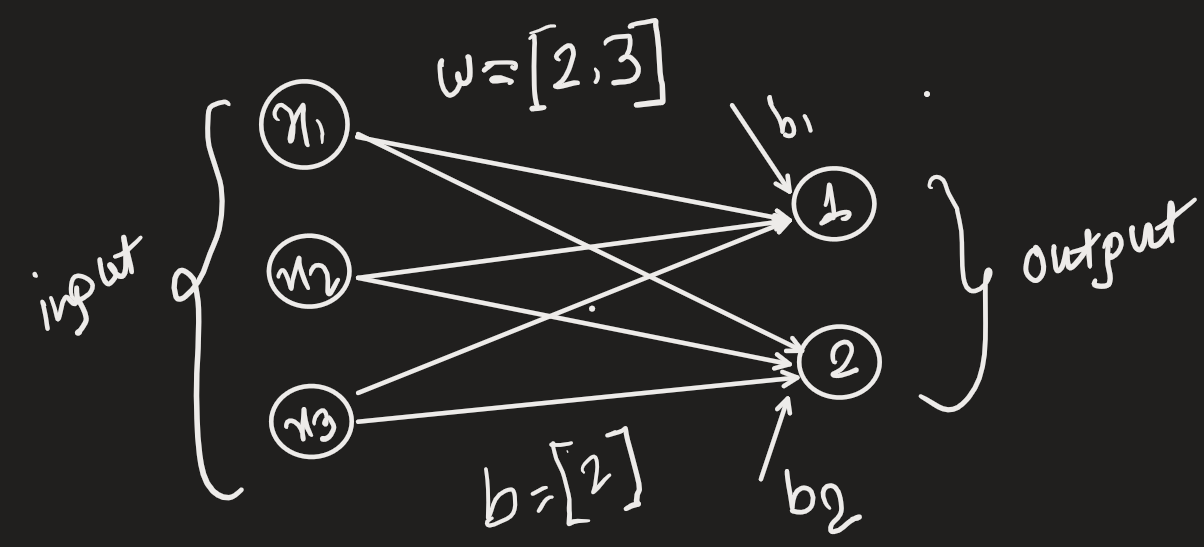

This picture shows that we are sending 3 features and the expecting output is 2 features as we defined in the array in the above program

# Why weights and bias are required in machine learning explain in simpl eway

In machine learning, weights and bias are essential because they help the model learn and make accurate predictions. Let’s break it down simply:

# 1. What are Weights?
* Weights determine the importance of each input feature.
* Think of it like adjusting the volume on a music system—higher weight means that input is more important in making predictions.

Example:

Imagine you are predicting house prices based on two features: size and number of rooms.

* If size is more important, its weight will be higher.
* If number of rooms is less important, its weight will be lower.
Formula:

$$Prediction=(Weight1 × Size)+(Weight2 × NumberOfRooms)+Bias$$
# 2. What is Bias?
* Bias helps the model adjust the output when all inputs are zero.
* It acts like a starting point for predictions.

Example:

If no size or number of rooms are given, the bias ensures the model doesn’t just output zero. It shifts the predictions up or down to fit the data better.

# Why are Weights & Bias Needed?

* Weights help the model learn which inputs are important.
* Bias ensures the model can make correct predictions even when inputs are zero.
* Without them, the model wouldn’t learn patterns in data properly! 🚀

In [35]:
w = torch.randn(2 , 3 , requires_grad=True)
b = torch.randn(2 , requires_grad=True)
print(w)
print(b)

tensor([[-0.7918, -1.1780,  0.2645],
        [-0.4069,  0.7032, -2.1158]], requires_grad=True)
tensor([ 0.0432, -0.3127], requires_grad=True)


```
tensor([[ 0.6819,  0.8449, -1.5182],

        [-0.2432,  1.0648, -0.7119]], requires_grad=True)
 ```

* This is a `2x3` matrix with random values. Each element in the matrix is a random number drawn from a standard normal distribution.

* `requires_grad=True `indicates that gradients will be computed for this tensor during backpropagation.


```
tensor([0.1202, 0.4904], requires_grad=True)
```

* This is a `1-dimensional` tensor (vector) with 2 elements. Each element is a random number drawn from a standard normal distribution.

* `requires_grad=True` indicates that gradients will be computed for this tensor during backpropagation.

In [36]:
w.shape , b.shape

(torch.Size([2, 3]), torch.Size([2]))

In linear regression, the model predicts outputs using:

$$Prediction=(Inputs×Weights)+Bias$$

`w = torch.randn(2 , 3 , requires_grad=True)`

* Weights (`w`) : A matrix that determines how much each input feature contributes to the prediction. Initialized randomly.
* Shape: (`2, 3`) → 2 outputs (because `targets` has 2 columns), 3 inputs (because `inputs `has 3 columns).

`b = torch.randn(2 , requires_grad=True)`
* Shape: `(2,)` → One bias value for each output.

* The `requires_grad=True` flag tells PyTorch to track operations on these tensors so we can compute gradients later.

The `requires_grad=True` flag tells PyTorch to track operations on these tensors so we can compute gradients later.

4. Define the Model
The model performs the linear transformation:

$$Prediction=(Inputs × Weights^T )+Bias$$

In [37]:
def model(x):
    return x @ w.t() + b

**$x @ w.t()$** performs matrix multiplication between the inputs and the transpose of the weights.
Adding `b` applies the bias.


## Explanation of Each Component

### `def model(x):`
This line defines a function named `model` that takes one argument `x`. In this context, `x` is typically a tensor representing input data.

### `x @ w.t()`
- **`x:`** This is the input tensor. It could be a matrix where each row represents a different data sample, and each column represents a feature.
- **`@:`** This is the matrix multiplication operator in Python. It performs matrix multiplication between `x` and `w.t()`.
- **`w.t():`** This is the transpose of the weight matrix `w`. The transpose operation flips the rows and columns of `w`, making it suitable for matrix multiplication with `x`.

### `+ b`
- **`+:`** This is the addition operator. It adds the bias tensor `b` to the result of the matrix multiplication.
- **`b:`** This is the bias tensor. It is added to each row of the result from the matrix multiplication to adjust the predictions.

## Putting It All Together

The function `model(x)` performs a linear transformation on the input tensor `x` using the weight matrix `w` and the bias tensor `b`. Here's a step-by-step breakdown:

### 1. Matrix Multiplication: `x @ w.t()`
This multiplies the input tensor `x` with the transpose of the weight matrix `w`. The result is a new tensor where each element is a weighted sum of the input features.

### 2. Adding Bias: `+ b`
The bias tensor `b` is added to each row of the result from the matrix multiplication. This adjusts the predictions to account for any fixed offset.

## Example
Let's see an example with some dummy data:

```pyhton
import torch

# Define input tensor x
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Define weight matrix w
w = torch.tensor([[0.5, 1.0], [1.5, 2.0]])

# Define bias tensor b
b = torch.tensor([0.1, 0.2])

# Define the model function
def model(x):
    return x @ w.t() + b

# Generate predictions
predictions = model(x)
print(predictions)
```

# Output

```text
tensor([[ 2.6,  5.2],
        [ 5.6, 11.2]])
```

In this example:

The input tensor `x` has two samples with two features each.

The weight matrix` w` has two rows and two columns.

The bias tensor` b` has two elements.

The function `model(x)` performs the linear transformation and returns the predictions.


5. Generate Predictions

In [38]:
preds = model(inputs)
preds

tensor([[-125.3113,  -73.8784],
        [-158.7471, -110.8662],
        [-211.3533,  -64.1982],
        [-121.5908,  -89.8590],
        [-149.1631, -108.9844]], grad_fn=<AddBackward0>)

In [39]:
targets = np.array([[57, 70],
                   [81, 101],
                   [119, 133],
                   [22 , 37],
                   [103, 119]], dtype = 'float32')

## 6. Calculate Loss

Loss measures how far off our predictions are from the actual targets. We use Mean Squared Error (MSE):

### MSE Loss
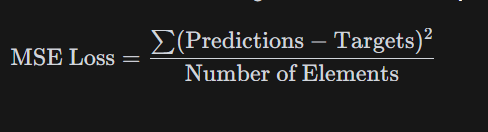

 
​

- \( N \) is the number of elements,
- \( Predictions \) represents the predicted values,
- \( Targets \) represents the actual target values.


In [40]:
def mse(t1 , t2):
    diff = (t1 - t2)
    return torch.sum(diff * diff) / diff.numel()

PyTorch torch.numel() method returns the total number of elements in the input tensor.

In [41]:
# Convert targets to a tensor
targets_tensor = torch.from_numpy(targets)

# Calculate loss
loss = mse(preds, targets_tensor)
loss

tensor(45659.9414, grad_fn=<DivBackward0>)

In [42]:
# Calculate the difference using the mse function
diff = preds - targets_tensor
diff

tensor([[-182.3113, -143.8784],
        [-239.7471, -211.8662],
        [-330.3533, -197.1982],
        [-143.5909, -126.8590],
        [-252.1631, -227.9844]], grad_fn=<SubBackward0>)

In [43]:
loss.backward()

In [44]:
# check the gradients
w.grad , b.grad

(tensor([[-19182.3945, -21592.4023, -13061.5947],
         [-15121.9443, -16410.0137, -10367.2793]]),
 tensor([-229.6331, -181.5572]))

Pytorch accumulates gradients so we need to set them to zero

In [45]:
w.grad.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [46]:
b.grad.zero_()

tensor([0., 0.])

1. Gradient Descent
2. Generate Predictions
3. Calculate loss
4. Update Weights/Bias
5. Clear out gradients

In [47]:
preds = model(inputs)

In [48]:
preds.shape , targets.shape

(torch.Size([5, 2]), (5, 2))

In [49]:
loss = mse(preds, targets_tensor)
loss

tensor(45659.9414, grad_fn=<DivBackward0>)

In [50]:
loss.backward()

In [51]:
# Adjust weights/Biases & reset gradients
with torch.no_grad(): # torch.no_grad() ensures these updates don't affect future gradient calculations.
    w -= w.grad * 1e-5 # 1e-5 (learning rate) controls how much weights should change.
    b -= b.grad * 1e-5
    w.grad.zero_() #Clears the gradients before the next iteration (since PyTorch accumulates them).
    b.grad.zero_() # Clears the gradients before the next iteration (since PyTorch accumulates them).

In [52]:
preds = model(inputs)
loss = mse(preds, targets_tensor)

In [53]:
loss

tensor(30998.1914, grad_fn=<DivBackward0>)

Running through multiple iterations and checking the loss

In [54]:
for i in range(20):
    preds = model(inputs)
    loss = mse(preds, targets_tensor)
    print(f'Epochs : {i} , Loss : {loss.item()}')
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Epochs : 0 , Loss : 30998.19140625
Epochs : 1 , Loss : 21116.181640625
Epochs : 2 , Loss : 14455.1748046875
Epochs : 3 , Loss : 9964.787109375
Epochs : 4 , Loss : 6937.16015625
Epochs : 5 , Loss : 4895.28662109375
Epochs : 6 , Loss : 3517.71533203125
Epochs : 7 , Loss : 2587.82666015625
Epochs : 8 , Loss : 1959.641357421875
Epochs : 9 , Loss : 1534.787353515625
Epochs : 10 , Loss : 1246.9722900390625
Epochs : 11 , Loss : 1051.5228271484375
Epochs : 12 , Loss : 918.3338012695312
Epochs : 13 , Loss : 827.1181640625
Epochs : 14 , Loss : 764.2030029296875
Epochs : 15 , Loss : 720.3759765625
Epochs : 16 , Loss : 689.4277954101562
Epochs : 17 , Loss : 667.1742553710938
Epochs : 18 , Loss : 650.7950439453125
Epochs : 19 , Loss : 638.3898315429688


In [55]:
targets

array([[ 57.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.]], dtype=float32)

In [56]:
preds

tensor([[ 60.6505,  71.0235],
        [ 86.0875,  80.0400],
        [ 82.4216, 161.1518],
        [ 58.7764,  53.2867],
        [ 88.2668,  74.9659]], grad_fn=<AddBackward0>)